In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data in pandas dataframe
labels_dev = pd.read_csv('C:/Users/deepti/Downloads/DataScientistModelProblem (5)/DataScientistModelProblem/labels_dev.tsv',delimiter='\t',encoding='utf-8',header = None,names = ["ID", "Labels"])
labels_dev.head()

fico_dev = pd.read_csv('C:/Users/deepti/Downloads/DataScientistModelProblem (5)/DataScientistModelProblem/fico_dev.tsv',delimiter='\t',encoding='utf-8',header = None,names = ["ID", "fico"])
fico_dev.head()

trans_dev = pd.read_csv('C:/Users/deepti/Downloads/DataScientistModelProblem (5)/DataScientistModelProblem/trans_dev.tsv',delimiter='\t',encoding='utf-8',header = None,names = ["ID", "days_to_loan_application","Amount","transaction_category","transaction_type"])
trans_dev.head()

fico_oot = pd.read_csv('C:/Users/deepti/Downloads/DataScientistModelProblem (5)/DataScientistModelProblem/fico_oot.tsv',delimiter='\t',encoding='utf-8',header = None,names = ["ID", "fico"])
fico_oot.head()

trans_oot = pd.read_csv('C:/Users/deepti/Downloads/DataScientistModelProblem (5)/DataScientistModelProblem/trans_oot.tsv',delimiter='\t',encoding='utf-8',header = None,names = ["ID", "days_to_loan_application","Amount","transaction_category","transaction_type"])
trans_oot.head()


,ID,days_to_loan_application,Amount,transaction_category,transaction_type
0,a21_bmdpf2RlaW55bWZoYX5iZWx9bX9md2puZH54aG1sb3Vz,0,600.00,ATM/Cash Withdrawals,debit
1,a21_bmdpf2RlaW55bWZoYX5iZWx9bX9md2puZH54aG1sb3Vz,0,78.00,Checks,debit
2,a21_bmdpf2RlaW55bWZoYX5iZWx9bX9md2puZH54aG1sb3Vz,0,29.01,Checks,debit
3,a21_bmdpf2RlaW55bWZoYX5iZWx9bX9md2puZH54aG1sb3Vz,0,60.00,ATM/Cash Withdrawals,debit
4,a21_bmdpf2RlaW55bWZoYX5iZWx9bX9md2puZH54aG1sb3Vz,0,157.39,Home Improvement,debit


In [3]:
labels_dev[['Labels']].astype(int)
labels_dev['Labels'].value_counts()
#fico_dev[['fico']].astype(int)

0.0    5772
1.0    1228
Name: Labels, dtype: int64

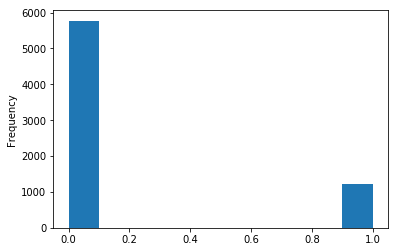

In [4]:
labels_dev['Labels'].plot.hist()

## Missing Values

In [5]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
# Missing values statistics
missing_values = missing_values_table(fico_dev)
missing_values.head(20)

Your selected dataframe has 2 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
fico,440,6.3


Here we can see that out ot 7000 rows in fico_dev, 440 are missing.

# Handling missing data -- this method also works to find the missing values but with my current version of anaconda and python
#it is not supportiv
#from sklearn.preprocessing import Imputer

#my_imputer = Imputer(missing_values='NaN', strategy='mean', axis=1)
#imputed_X_train = my_imputer.fit_transform(fico_dev)

#imputed_X_test = my_imputer.transform(labels_dev)
#print("Mean Absolute Error from Imputation:")
#print(score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))

In [7]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [8]:
fico_dev_final = DataFrameImputer().fit_transform(fico_dev)

# Missing values statistics
missing_values = missing_values_table(fico_dev_final)
missing_values

Your selected dataframe has 2 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [9]:
#Joining fico and trans - training data
train_x = pd.merge(fico_dev_final, trans_dev, on='ID')
missing_values = missing_values_table(train_x)
missing_values


Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [10]:
#Joining fico and trans - test data
test_x = pd.merge(fico_oot, trans_oot, on='ID')
missing_values = missing_values_table(test_x)
missing_values


Your selected dataframe has 6 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
fico,5773,0.6
Amount,258,0.0
transaction_category,258,0.0
transaction_type,258,0.0


In [11]:
test_x_final = DataFrameImputer().fit_transform(test_x)

# Missing values statistics
missing_values = missing_values_table(test_x_final)
missing_values

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [12]:
train_x.head()

,ID,fico,days_to_loan_application,Amount,transaction_category,transaction_type
0,aXB8f213cmZlZm9xcWZoYnBlZW18bH9mamR8dGxlcGtsaXhz,581.0,0,20.51,Groceries,debit
1,aXB8f213cmZlZm9xcWZoYnBlZW18bH9mamR8dGxlcGtsaXhz,581.0,0,866.96,Credit Card Payments,credit
2,aXB8f213cmZlZm9xcWZoYnBlZW18bH9mamR8dGxlcGtsaXhz,581.0,0,7.00,Rent,debit
3,aXB8f213cmZlZm9xcWZoYnBlZW18bH9mamR8dGxlcGtsaXhz,581.0,0,38.82,Checks,debit
4,aXB8f213cmZlZm9xcWZoYnBlZW18bH9mamR8dGxlcGtsaXhz,581.0,0,36.00,Service Charges/Fees,debit


In [13]:
train = pd.merge(labels_dev, train_x, on='ID')
missing_values = missing_values_table(train)
missing_values

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [14]:
train_x_final =train.loc[:, train.columns != 'Labels']
train_y_final = train.loc[:, train.columns == 'Labels']
train_y_final.head()

,Labels
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


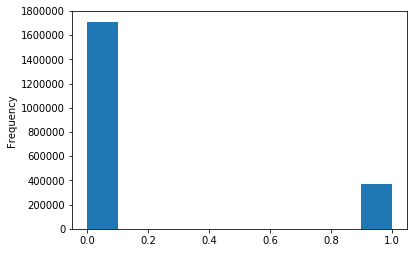

In [15]:
# highly imbalanced data
train_y_final['Labels'].plot.hist()

In [16]:
train_x_final['transaction_category'].dtypes
train_x_final['transaction_type'].dtypes

train_x_final['fico'].dtypes

#train_x_final.columns

dtype('float64')

# Data Pre Processing

In [17]:
# Importing LabelBinarizer and initializing it
from sklearn.preprocessing import LabelBinarizer
le=LabelBinarizer()
# Iterating over all the common columns in train and test
for col in train_x_final.columns.values:
# Encoding only categorical variables
       if train_x_final[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=train_x_final[col]
        le.fit(data.values)
        train_x_final[col]=le.transform(train_x_final[col])
        

MemoryError: 

In [161]:
train_x_final.head()

,ID,fico,days_to_loan_application,Amount,transaction_category,transaction_type
0,1417,581.0,0,20.51,20,1
1,1417,581.0,0,866.96,10,0
2,1417,581.0,0,7.00,42,1
3,1417,581.0,0,38.82,6,1
4,1417,581.0,0,36.00,49,1


In [162]:
le=LabelBinarizer()
# Iterating over all the common columns in train and test
for col in test_x_final.columns.values:
# Encoding only categorical variables
       if test_x_final[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=test_x_final[col]
        le.fit(data.values)
        test_x_final[col]=le.transform(test_x_final[col])

In [163]:
test_x_final.head()

,ID,fico,days_to_loan_application,Amount,transaction_category,transaction_type
0,200,651.0,0,600.00,0,1
1,200,651.0,0,78.00,6,1
2,200,651.0,0,29.01,6,1
3,200,651.0,0,60.00,0,1
4,200,651.0,0,157.39,22,1


In [151]:
train_x_final.head()

,ID,fico,days_to_loan_application,Amount,transaction_category,transaction_type
0,1417,581.0,0,20.51,20,1
1,1417,581.0,0,866.96,10,0
2,1417,581.0,0,7.00,42,1
3,1417,581.0,0,38.82,6,1
4,1417,581.0,0,36.00,49,1


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Train model
clf_4 = RandomForestClassifier()
clf_4.fit(train_x_final, train_y_final)
 
# Predict on training set
pred_y_4 = clf_4.predict(test_x_final)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
#print( accuracy_score(y, pred_y_4) )
# 0.9744
 
# What about AUROC?
prob_y_4 = clf_4.predict_proba(test_x_final)
prob_y_4 = [p[1] for p in prob_y_4]
prob_y_4.count
#print( roc_auc_score(y, prob_y_4) )
# 0.999078798186

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x_final, train_y_final, test_size=0.33, random_state=42)

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Train model
clf_4 = RandomForestClassifier()
clf_4.fit(X_train, y_train)
 
# Predict on training set
pred_y_4 = clf_4.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_4) )
# 0.9744
 
# What about AUROC?
prob_y_4 = clf_4.predict_proba(X_test)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y_test, prob_y_4) )


C:\Users\deepti\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0. 1.]
0.9964610497285786
0.9998625752719426


In [176]:
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_test, prob_y_1)
roc_au1c = auc(false_positive_rate, true_positive_rate)

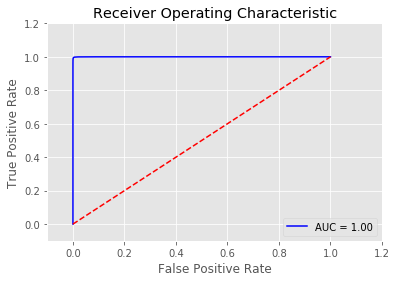

In [177]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1, 'b',label='AUC = %0.2f'% roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logistic Regression

In [180]:
from sklearn.linear_model import LogisticRegression
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create logistic regression object
model = LogisticRegression()
# Train the model using the training sets and check score
model.fit(X_train, y_train)
model.score(X_train, y_train)
#Equation coefficient and Intercept
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)
#Predict Output
predicted= model.predict(X_test)

C:\Users\deepti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coefficient: 
 [[ 1.64028799e-06 -2.59661957e-03  8.03258361e-04 -5.00263807e-06
   3.77563144e-03  1.72950961e-04]]
Intercept: 
 [0.00013528]


In [183]:
 
# How's our accuracy?
print( accuracy_score(y_test, predicted) )

 
# What about AUROC?
prob_y_3 = model.predict_proba(X_test)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y_test, prob_y_3) )

0.8218088355937233
0.6263699508939936


In [184]:
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_test, prob_y_2)
roc_auc2 = auc(false_positive_rate2, true_positive_rate2)

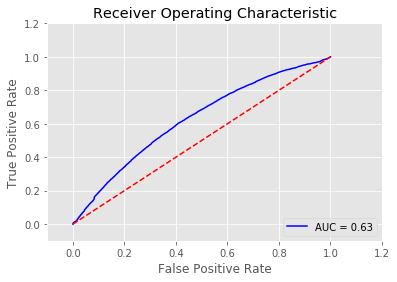

In [185]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate2, true_positive_rate2, 'b',label='AUC = %0.2f'% roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVM - Support Vector Machines

In [ ]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC() # there is various option associated with it, this is simple for classification. You can refer link, for mo# re detail.
# Train the model using the training sets and check score
model.fit(X_train, y_train)
model.score(X_train, y_train)
#Predict Output
predicted= model.predict(X_test)

C:\Users\deepti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
 
# How's our accuracy?
print( accuracy_score(y_test, predicted) )

 
# What about AUROC?
prob_y_2 = model.predict_proba(X_test)
prob_y_2 = [p[1] for p in prob_y_2]
print( roc_auc_score(y_test, prob_y_2) )

In [ ]:
false_positive_rate3, true_positive_rate3, thresholds3 = roc_curve(y_test, prob_y_3)
roc_auc3 = auc(false_positive_rate3, true_positive_rate3)

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate3, true_positive_rate3, 'b',label='AUC = %0.2f'% roc_auc3)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Trying to find best model
model_RFC = RandomForestClassifier(n_estimators = 70)
#model_KNC = KNeighborsClassifier(n_neighbors = 18) 
model_LR = LogisticRegression(penalty='l1', tol=0.01) 
#model_gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)
model_SVM = svm.SVC() 
#model_xgb = XGBClassifier()
#model_svc = SVC(kernel='rbf', random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x_final, train_y_final, test_size=0.33, random_state=42)
results = {}
kfold = 5


In [ ]:
results['RFC'] = model_selection.cross_val_score(model_RFC, train_x_final, train_y_final, cv=kfold).mean()
#results['KNeighborsClassifier_best_params'] = model_selection.cross_val_score(model_knc, numeric_data_best, target, cv=kfold).mean()
results['LR'] = model_selection.cross_val_score(model_LR, train_x_final, train_y_final, cv = kfold).mean()
#results['GradientBoosting_best_params'] = model_selection.cross_val_score(model_gb, numeric_data_best, target, cv = kfold).mean()
results['SVM'] = model_selection.cross_val_score(model_SVM, train_x_final, train_y_final, cv = kfold).mean()
#results['XGB_best_params'] = model_selection.cross_val_score(model_xgb, numeric_data_best, target, cv = kfold).mean()

In [ ]:
plt.bar(range(len(results)), results.values(), align='center')
plt.xticks(range(len(results)), list(results.keys()), rotation='vertical')
plt.show()

In [ ]:
# Plot of ROC curve of all the algorithms - SVM,Random forest and Logistic regression

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()
plt.plot(false_positive_rate1,false_positive_rate1,label='Random Forest, AUC = %0.2f'% roc_auc1)
plt.plot(false_positive_rate2,false_positive_rate2,label='Logistic Regression, AUC = %0.2f'% roc_auc2)
plt.plot(false_positive_rate3,false_positive_rate3,label='SVM, AUC = %0.2f'% roc_auc3)

plt.legend(loc=0)